<a href="https://colab.research.google.com/github/henil2097/Analytical-Model-For-Estimating-Tumor-Growth-Rate/blob/master/Dhruv_Try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
data = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')

In [0]:
data1 = data[data['id'] == 22]

In [0]:
def find_volume(t, A, V0, r):
  return  V0*np.exp(A*(1-np.exp(-r*t)))

def cal_rate(t1, t2, V1, V2):
  return (V2-V1)/(t2-t1)

def cal_rate_g(t1, t2, v1, v2):
  Vinf = 1000000  #753312.102292    ################################# Need to check #################################
  return (math.log(Vinf/v1) - math.log(Vinf/v2)) / (t2-t1)

In [0]:
from scipy.optimize import curve_fit
t = data1['Time'].values
vol = data1['TumVol'].values
g = [27.631,100,0.2]
c,cov = curve_fit(find_volume,t,vol,g, maxfev=10000)
print(c)
print(cov)

[4.51354051e+03 9.62610823e+01 6.28646311e-05]
[[ 5.31790404e+13  3.61872026e+08 -7.41100781e+05]
 [ 3.61872026e+08  3.42870134e+03 -5.04330843e+00]
 [-7.41100781e+05 -5.04330843e+00  1.03279481e-02]]


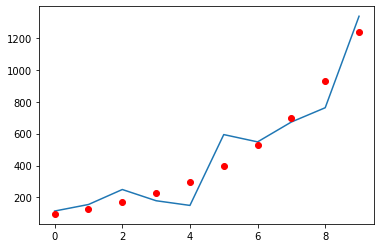

In [0]:
n = len(data1['Time'])
y = np.empty(n)
for i in range(n):
  y[i] = find_volume(data1['Time'][i+187],c[0],c[1],c[2])

plt.plot(data1['Time'],data1['TumVol'])
plt.plot(data1['Time'],y,'ro')

# April 28, 2020

In [0]:
n = 28
rate = np.empty(n)
init_vol = np.empty(n)

start_index = [0, 8, 16, 23, 33, 41, 50, 57, 68, 78, 85, 95, 106, 116, 127, 136, 146, 155, 164, 172, 180, 187, 197, 208, 218, 229, 238, 249]
no_of_records = [8, 8, 7, 10, 8, 9, 7, 11, 10, 7, 10, 11, 10, 11, 9, 10, 9, 9, 8, 8, 7, 10, 11, 10, 11, 9, 11, 8]

j = 0

for i in range(n):
  j = start_index[i]
  init_vol[i] = data['TumVol'][j]
  rate[i] = cal_rate(0, 1, data['TumVol'][j], data['TumVol'][j+1])


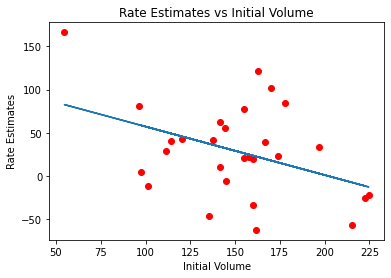

In [0]:
plt.plot(init_vol,rate, 'ro')
plt.xlabel('Initial Volume')
plt.ylabel('Rate Estimates')
plt.title('Rate Estimates vs Initial Volume')
m, b = np.polyfit(init_vol, rate, 1) # m = slope, b=intercept
plt.plot(init_vol, m*init_vol + b)

In [0]:
init_vol

array([120.1, 162.7, 155.2, 224.6, 170.2, 135.2, 141.8, 174.2, 141.5,
       155.2, 177.9,  54.7, 160. , 111.6, 145. , 144.1, 101.1, 215. ,
       160.2, 137.8,  97.2, 114.3, 157.9, 222.5,  96.1, 166.7, 161.8,
       196.9])

In [0]:
rate

array([ 42.7, 121.6,  77.9, -22.3, 101.5, -46.7,  10.8,  23. ,  62.9,
        21.1,  84.9, 166.4,  20.1,  29.4,  -6.2,  55.8, -11.5, -56.1,
       -33.3,  41.2,   4.9,  41.1,  21.8, -25.3,  81.4,  39. , -62.3,
        33.9])

In [0]:
rate_redu = np.empty(0)
init_vol_redu = np.empty(0)
for i in range(n):
  if rate[i] >= 0 and rate[i] < 125:
    rate_redu = np.append(rate_redu,rate[i])
    init_vol_redu = np.append(init_vol_redu, init_vol[i])

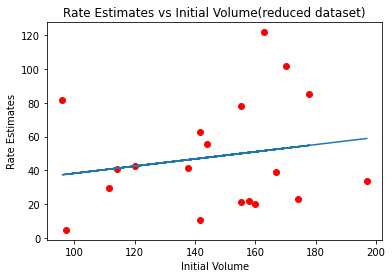

In [0]:
plt.plot(init_vol_redu,rate_redu, 'ro')
plt.xlabel('Initial Volume')
plt.ylabel('Rate Estimates')
plt.title('Rate Estimates vs Initial Volume(reduced dataset)')
m, b = np.polyfit(init_vol_redu, rate_redu, 1) # m = slope, b=intercept
plt.plot(init_vol_redu, m*init_vol_redu + b)

Plotted graph for initial volume v/s rate -

we got some negative rate values and some points where clearly outliers and the linear regression line was negative
After removing this negative values and outliers (removing this patients) we plotted again and this time Linear Regression line was positive

conclusion : getting a positive linear line shows that patients with high initial volume will have higher rate as compared to patients with lower initial volume

# April 30, 2020

In [0]:
id = 23

time = data[data['id'] == id]['Time'].values
TumVol = data[data['id'] == id]['TumVol'].values
guess = [27.631, 100, 0.2]
c,cov = curve_fit( find_volume, time, TumVol, guess, maxfev=10000)
print(data[data['id'] == id], c)


     Group  id  Time  TumVol
197      3  23     0   157.9
198      3  23     1   179.7
199      3  23     2   171.2
200      3  23     3   189.1
201      3  23     4   254.1
202      3  23     5   261.6
203      3  23     6   358.8
204      3  23     7   409.8
205      3  23     8   668.6
206      3  23     9   992.2
207      3  23    10  1131.8 [7.22295238e+03 7.99589781e+01 3.69980551e-05]


In [0]:
n = no_of_records[id - 1] - 1
rate_by_initVol = np.empty(n)
rate_by_initVol_g = np.empty(n)
time = np.empty(n)
TumVol_g = np.empty(n + 1)

for i in range(n + 1):
  TumVol_g[i] = find_volume( i, c[0],c[1],c[2])
print(TumVol_g)

for i in range(n):
  time[i] = i
  rate_by_initVol[i] = cal_rate(0, i+1, data['TumVol'][start_index[id - 1]], data['TumVol'][start_index[id - 1] + i + 1]) / math.log(data['TumVol'][start_index[id - 1]])
  rate_by_initVol_g[i] = cal_rate(0, i+1, TumVol_g[0], TumVol_g[i+1]) / math.log(TumVol_g[0])
print(rate_by_initVol, time, rate_by_initVol_g)

[  79.9589781   104.45370684  136.45083094  178.2478167   232.84555937
  304.16371739  397.32195317  519.00724827  677.95363184  885.56871888
 1156.75197801]
[ 4.30663058  1.31371988  2.05453936  4.75112227  4.09722561  6.61469483
  7.10904484 12.61121695 18.31305755 19.23957578] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [ 5.59047175  6.4466137   7.47754046  8.72338823 10.23412241 12.0720446
 14.31495719 17.06016147 20.42951339 24.57582165]


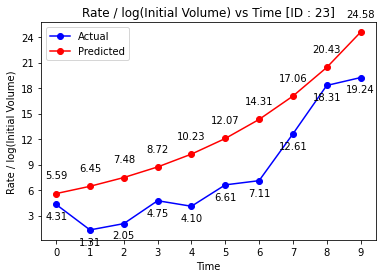

In [0]:
plt.plot(time,rate_by_initVol, 'bo-', label = 'Actual')
plt.xlabel('Time')
plt.ylabel('Rate / log(Initial Volume)')
plt.title('Rate / log(Initial Volume) vs Time' + ' [ID : ' + str(id) + ']')
# zip joins x and y coordinates in pairs
for x,y1,y2 in zip(time,rate_by_initVol,rate_by_initVol_g):

    label1 = "{:.2f}".format(y1)
    label2 = "{:.2f}".format(y2)

    plt.annotate(label1, # this is the text
                 (x,y1), # this is the point to label
                 textcoords="offset points", # how to position the text
                 rotation=0, # rotate the label
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    plt.annotate(label2, # this is the text
                 (x,y2), # this is the point to label
                 textcoords="offset points", # how to position the text
                 rotation=0, # rotate the label
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xticks(np.arange(start = 0, stop = 10, step = 1, dtype = None))
plt.yticks(np.arange(0,50,3))

#plt.show()
plt.plot(time,rate_by_initVol_g, 'ro-', label = 'Predicted')
#plt.xlabel('Time')
#plt.ylabel('Rate_g / log(Initial Volume)')
#plt.title('Rate_g / log(Initial Volume) vs Time' + ' [ID : ' + str(id) + ']')
plt.legend()
plt.show()

In [0]:
n = no_of_records[id - 1] - 1
rate_by_vol = np.empty(n)
rate_by_vol_g = np.empty(n)
time = np.empty(n)

for i in range(n):
  time[i] = i
  rate_by_vol[i] = cal_rate(0, i+1, data['TumVol'][start_index[id - 1]], data['TumVol'][start_index[id - 1] + i + 1]) / math.log(data['TumVol'][start_index[id - 1] + i + 1])
  rate_by_vol_g[i] = cal_rate(0, i+1, TumVol_g[0], TumVol_g[i+1]) / math.log(TumVol_g[i+1])
print(rate_by_vol, time, rate_by_vol_g)

[ 4.19934257  1.29306176  1.98387114  4.34293639  3.72564814  5.69176783
  5.98199683  9.81332436 13.43492922 13.85040258] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [ 5.26910685  5.74575495  6.32101895  7.01266289  7.84266366  8.83810626
 10.03231056 11.46624131 13.19026803 15.26635914]


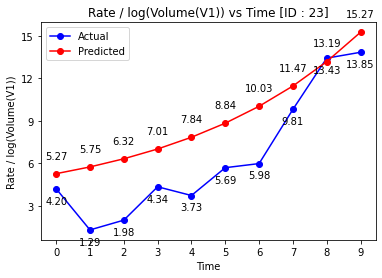

In [0]:
plt.plot(time,rate_by_vol, 'bo-', label = 'Actual')
plt.xlabel('Time')
plt.ylabel('Rate / log(Volume(V1))')
plt.title('Rate / log(Volume(V1)) vs Time' + ' [ID : ' + str(id) + ']')
# zip joins x and y coordinates in pairs
for x,y1,y2 in zip(time,rate_by_vol,rate_by_vol_g):

    label1 = "{:.2f}".format(y1)
    label2 = "{:.2f}".format(y2)

    plt.annotate(label1, # this is the text
                 (x,y1), # this is the point to label
                 textcoords="offset points", # how to position the text
                 rotation=0, # rotate the label
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    plt.annotate(label2, # this is the text
                 (x,y2), # this is the point to label
                 textcoords="offset points", # how to position the text
                 rotation=0, # rotate the label
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xticks(np.arange(start = 0, stop = 10, step = 1, dtype = None))
plt.yticks(np.arange(0,50,3))
#plt.show()

plt.plot(time,rate_by_vol_g, 'ro-', label = 'Predicted')
#plt.xlabel('Time')
#plt.ylabel('Rate_g / log(Volume(V1))')
#plt.title('Rate_g / log(Volume(V1)) vs Time' + ' [ID : ' + str(id) + ']')
plt.legend()
plt.show()